In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("res.csv", delimiter=" ")
ACCURATE = 0.944517
df

,n,mega,mini
0,100,0.777771,0.794300
1,600,1.101840,1.016820
2,1100,0.928022,0.944864
3,1600,0.862840,0.966469
4,2100,1.046290,0.956057
...,...,...,...
195,97600,0.941533,0.945777
196,98100,0.926824,0.944298
197,98600,0.957423,0.943281
198,99100,0.932776,0.946690


## График площади

На графике указаны зависимости приближенных значений площади от числа сгенерированных точек `n`. Запуск проводился при широких границах и при плотных (указаны на графике)

По данным на графике видно, что при более плотных границах результат оказывается более точным. При широких границах заметны значительные отклонения даже при большом `n`.

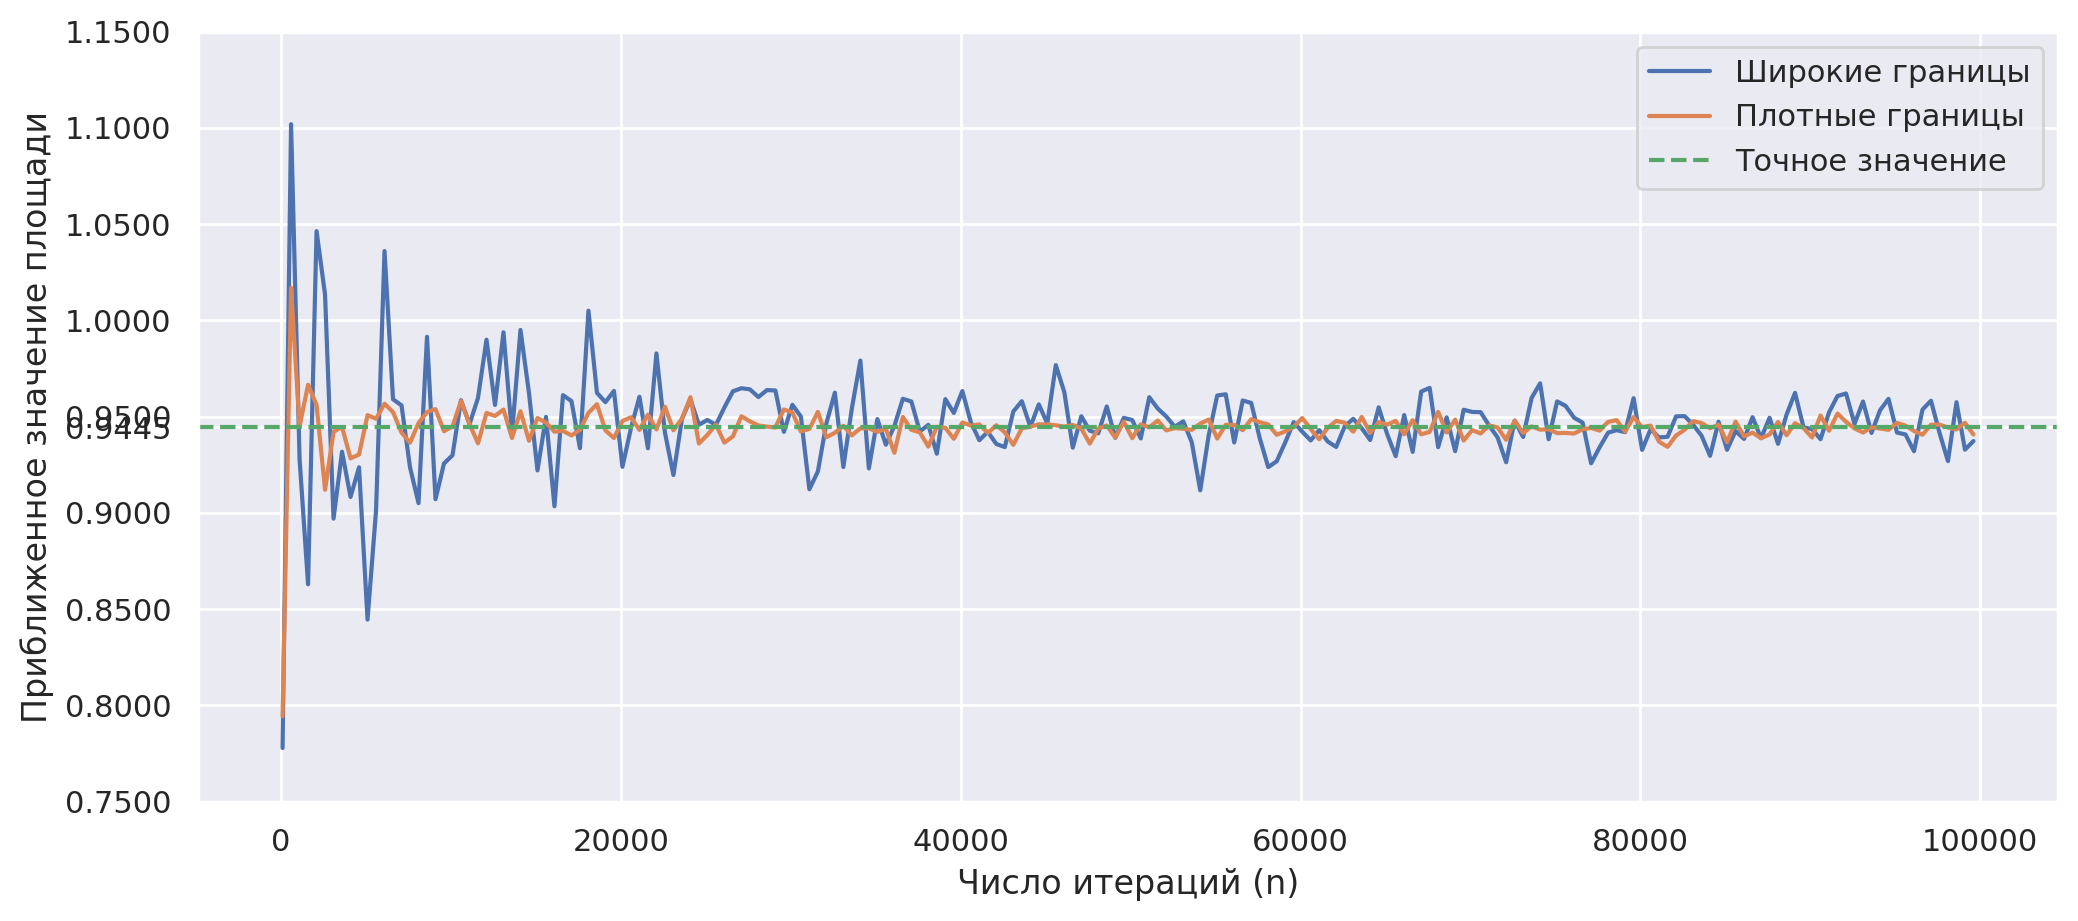

In [3]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12, 5), dpi=200)
data = df
ax = plt.subplot(ylabel='Приближенное значение площади', xlabel='Число итераций (n)')
sns.lineplot(data, x='n', y='mega', label='Широкие границы', ax=ax)
sns.lineplot(data, x='n', y='mini', label='Плотные границы', ax=ax)
green = sns.color_palette()[2]
ax.axhline(ACCURATE, ls='--', label="Точное значение", c=green)
ax.set_yticks(np.append(ax.get_yticks(), ACCURATE))
ax.legend()
plt.show()

## График относительного отклонения

По данным на графике видно, что относительно отклонение при малых `n` заметно больше, чем при больших значениях параметра. Результат при плотных границах в целом меньше отклонён, чем при широких. При этом на больших `n` все же заметны выбросы

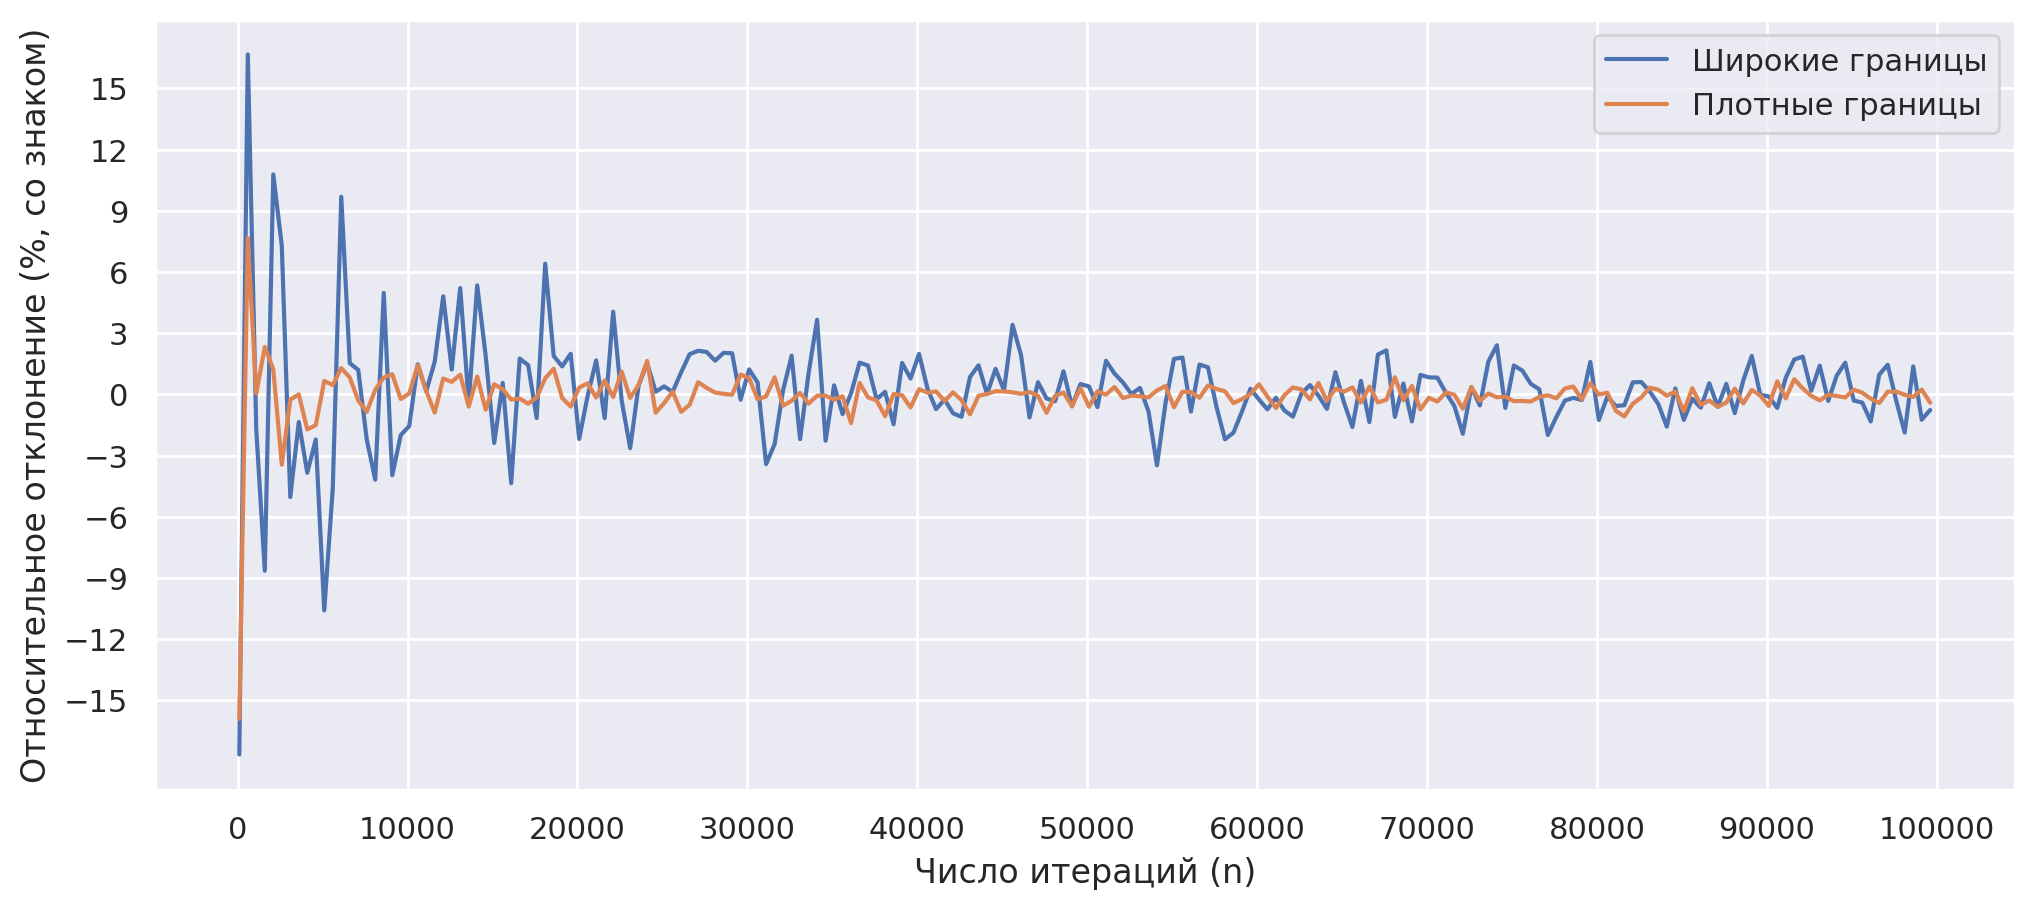

In [4]:
data2 = df.copy()
data2['mega'] = (data2['mega'] - ACCURATE) / ACCURATE * 100
data2['mini'] = (data2['mini'] - ACCURATE) / ACCURATE * 100

plt.figure(figsize=(12, 5), dpi=200)
ax2 = plt.subplot(ylabel='Относительное отклонение (%, со знаком)', xlabel='Число итераций (n)')
sns.lineplot(data2, x='n', y='mega', label='Широкие границы', ax=ax2)
sns.lineplot(data2, x='n', y='mini', label='Плотные границы', ax=ax2)
ax2.legend()
ax2.set_xticks(np.arange(0, 100_000+1, 10_000))
ax2.set_yticks(np.arange(-15, 15+1, 1), minor=True)
ax2.set_yticks(np.arange(-15, 15+1, 3))
plt.show()

## Выводы

Изучив работу алгоритма на разных данных, можно понять, что для лучшей работы нужно правильно подобрать параметры: если площадь границ близка к площади искомой фигуры, заметна большая точность. Кроме того, при небольшом числе итераций часто возникают выбросы.